In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
from PIL import Image
from numpy import linalg as LA
from scipy.ndimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing, binary_fill_holes,generate_binary_structure
from scipy.ndimage import gaussian_filter
from skimage import measure

def getLargestCC(segmentation):
    labels = measure.label(segmentation)
    assert( labels.max() != 0 ) # assume at least 1 CC
    largestCC = labels == np.argmax(np.bincount(labels.flat)[1:])+1
    return largestCC



def kmeanOnAnImage(testimg,k):
    # This is not a good initialization: Sometimes we get empty clusters!
    ny,nx,nc = testimg.shape
    c = np.random.rand(nc,k)

    maxIter = 15
    for i in range(0,maxIter):
        # step 1: update mask
        diff = np.zeros((ny,nx,k))
        for l in range(0,k):
            cl_3d = c[:,l][np.newaxis, np.newaxis,:]
            cl_image = np.repeat(np.repeat(cl_3d, ny, axis=0), nx, axis=1)
            diff[:,:,l] = np.sum((cl_image- testimg)**2,axis = 2)

        indi = np.argmin(diff, axis=2)


        # stept 2: update colors
        for l in range(0,k):
            ml = indi==l
            count = np.max([np.sum(ml),1])
            ml_3d = np.repeat(ml[:,:,np.newaxis], nc, axis=2)
            c[:,l] = 1/count*(ml_3d*testimg).sum(axis=0).sum(axis=0)

        approxImg = np.zeros((ny,nx,nc))
        for l in range(0,k):
                ml = indi==l
                approxImg = approxImg + ml[:,:,np.newaxis]* np.repeat(np.repeat(c[:,l][np.newaxis, np.newaxis,:], ny, axis=0), nx, axis=1)
            
    return indi, approxImg

In [4]:
img_dir="cat.jpg"
img_pil=Image.open(img_dir)
catImg=np.array(img_pil)/255.0

catImgNormalized = catImg / np.maximum(catImg.mean(axis=2)[:,:,np.newaxis],2/255)
catImgNormalized = catImgNormalized / np.max(catImgNormalized)



catImgNormalized2 = catImg / np.maximum(np.sqrt(np.sum(catImg**2,axis=2))[:,:,np.newaxis],5/255)


segmentationMap = catImgNormalized2[:,:,1]<0.6
se = np.ones((5,5), dtype=bool)
segmentationMap = binary_closing(segmentationMap,se)
segmentationMap=getLargestCC(segmentationMap)
se = np.ones((9,9), dtype=bool)
segmentationMap = binary_opening(segmentationMap,se)


plt.figure(figsize=(10,15))
plt.imshow(catImg*segmentationMap[:,:,np.newaxis])
#plt.imshow(segmentationMap, alpha=0.4)#.mean(axis=2)<0.3)
plt.show()


img_dir="beach.jpg"
img_pil=Image.open(img_dir)
beachImg=np.array(img_pil)/255.0

plt.figure(figsize=(10,15))
plt.imshow(beachImg)
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'cat.jpg'

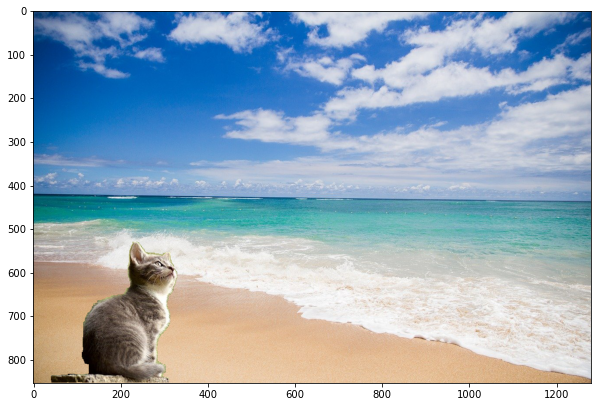

In [68]:
manipulatedImg = beachImg.copy()

ny,nx,nc = catImg.shape

manipulatedImg[-ny-1:-1, 0:nx,:] = catImg*segmentationMap[:,:,np.newaxis] + (1-segmentationMap[:,:,np.newaxis])*beachImg[-ny-1:-1, 0:nx,:]


plt.figure(figsize=(10,15))
plt.imshow(manipulatedImg)
plt.show()


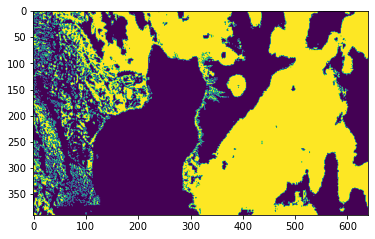

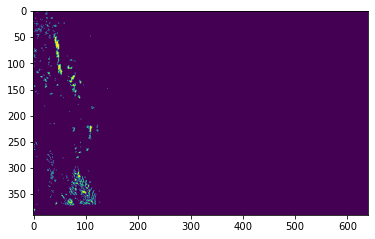

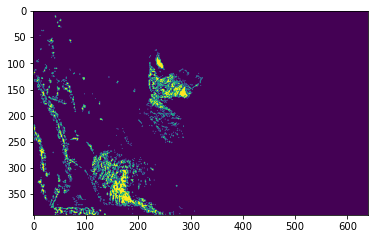

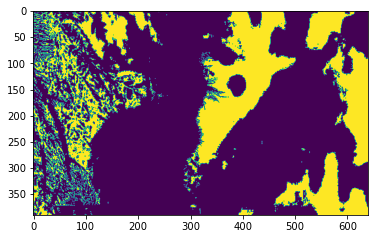

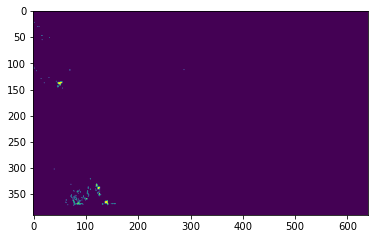

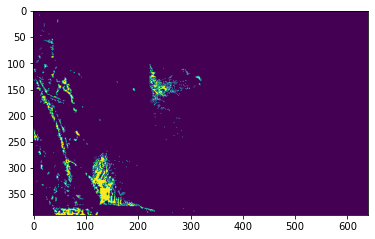

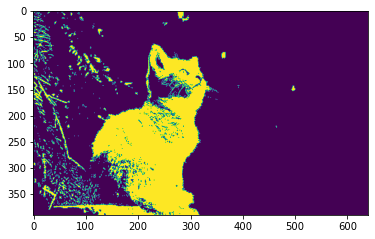

In [65]:
k = 7
indi, approxImg = kmeanOnAnImage(catImgNormalized2,k)

for i in range(k):
    plt.imshow(indi==i)
    plt.show()

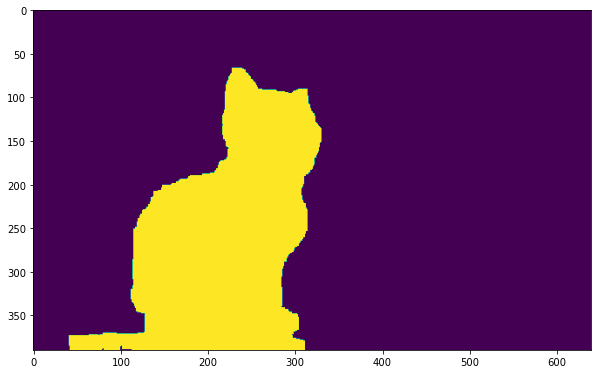

In [72]:
segmentationMap = (indi==2)+(indi==5)+(indi==6)



#se = np.ones((3,3), dtype=bool)
#segmentationMap = binary_closing(segmentationMap,se)
segmentationMap = binary_fill_holes(segmentationMap)
se = np.ones((11,11), dtype=bool)
segmentationMap = binary_opening(segmentationMap,se)
segmentationMap=getLargestCC(segmentationMap)

plt.figure(figsize=(10,15))
#plt.imshow(catImg*segmentationMap[:,:,np.newaxis])
plt.imshow(segmentationMap)#.mean(axis=2)<0.3)
plt.show()


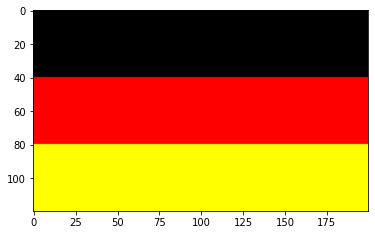

True


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

germanFlag = np.zeros((120,200,3))
germanFlag[40:80,:,0] = 1
germanFlag[80:120,:,0] = 1
germanFlag[80:120,:,1] = 1

plt.imshow(germanFlag)
plt.show()

img = germanFlag.copy()

ny,nx,nc = img.shape
third = np.floor(ny/3).astype(int)
count = 0
# is this image divided into three constant horizontal strips?
myAnswer = True

for i in range(3):
    averageColorOfThird = img[count:count+third,:,:].mean(axis=(0,1))
    difference = (img[count:count+third,:,:] - averageColorOfThird[np.newaxis,np.newaxis,:])
    howManyValuesAreLargerThanATolerance = (np.abs(difference)>0.05).sum()
    if howManyValuesAreLargerThanATolerance>0:
        myAnswer = False
        break
    count +=third
    
print(myAnswer)
